## Recitation0-C: Pytorch_Tensors_Conversion

## Contents

### PART - 1

1. Introduction
1. Pytorch Tensors
  1. Tensor creation
  2. Tensor conversion
2. Accessing and modifying tensors
  1. Tensor indexing
  2. Tensor slicing
3. Pivoting and reshaping tensors
  1. Flatten
  1. Squeeze and Unsqueeze
  1. Reshape
  1. View
  1. Transpose
  1. Permute

### PART - 2
4. Combining tensors
  1. Concatenate
  1. Stack
  1. Padding
5. Mathematical operations
  1. Point-wise/element-wise operations
  1. Reduction operations
  1. Comparison operations
  1. Vector/Matrix operations

## Introduction

1. PyTorch is an open-source deep learning framework
    1. Provides building blocks to implement, train and test deep learning networks easily
    1. Greater flexibility for research 
    1. Facebook, Tesla, Microsoft, OpenAI, Nike, JP Morgan and Chase, ...
1. Installation: \\
  pip3 install torch torchvision torchaudio \\
  OR \\
  conda install pytorch torchvision torchaudio -c pytorch

In [15]:
!pip3 install torch torchvision torchaudio

## PyTorch Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

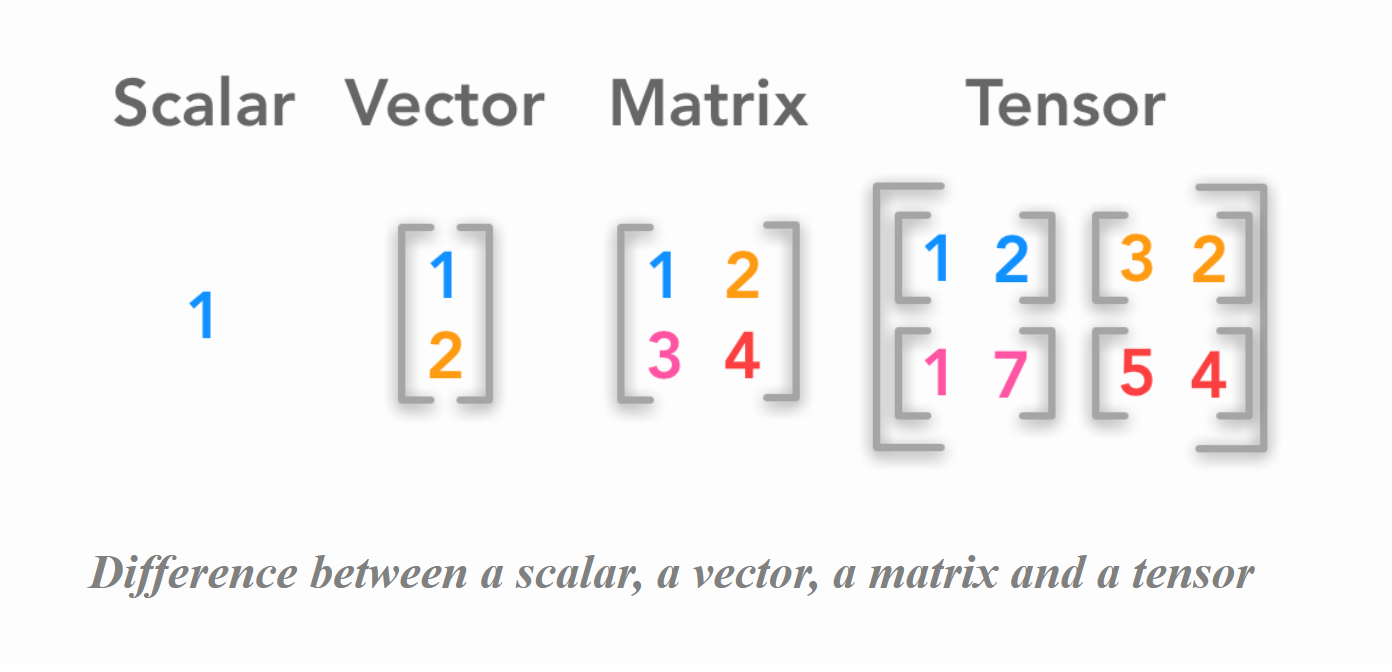
[Source](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.1-Scalars-Vectors-Matrices-and-Tensors/)

Tensors are similar to Numpy’s ndarrays, but the biggest difference is that tensors can run on GPUs (Graphics Processing Unit) or other hardware accelerators. You can parallelize tensor computation, which reduces the run time.


In [16]:
import torch

In [17]:
# Check to see if your system has gpu
device = torch.cuda.is_available()
print(device) # prints True if gpu is available, else False

False


### Tensor Creation

In [18]:
t1 = torch.ones(size=(5,3))       # Tensors of ones of dimension 5x3
t2 = torch.zeros(size=(5,3))      # Tensors of zeros of dimension 5x3
t3 = torch.eye(3)                 # Identity matrix tensor of size 3
t4 = torch.rand(size=(3,4))       # Tensor of Uniformly distrubuted random numbers [0, 1) of size 3x4
t5 = torch.arange(7)              # A 1D tensor of integers [0, n-1]

print(t1)
print(t2)
print(t3)
print(t4)
print(t5)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[0.6965, 0.9143, 0.9351, 0.9412],
        [0.5995, 0.0652, 0.5460, 0.1872],
        [0.0340, 0.9442, 0.8802, 0.0012]])
tensor([0, 1, 2, 3, 4, 5, 6])


#### Creating tensors from existing data (list, array & existing tensors)

In [19]:
import numpy as np

t1 = torch.tensor([1,2,3,4])                # from python list
t2 = torch.tensor(np.array([1,2,3,4]))      # from numpy array
t3 = torch.tensor(np.random.randn(3))       # from numpy array
t4 = t3.clone()                             # copy from existing torch tensor

print(t1)
print(t2)
print(t3)
print(t4)

tensor([1, 2, 3, 4])
tensor([1, 2, 3, 4])
tensor([-0.5740,  0.1378,  0.1259], dtype=torch.float64)
tensor([-0.5740,  0.1378,  0.1259], dtype=torch.float64)


### Tensor conversion

In [20]:
# Create a numpy array
arr = np.array([10, 20, 30, 40, 50])
print(arr)
print(type(arr), arr.dtype)
print("=======================================")

# Convert from numpy to tensor
tensor = torch.from_numpy(arr)
print(tensor)
print(type(tensor), tensor.dtype)
print("=======================================")

# Changing datatype of a tensor
print(tensor.float(), tensor.float().dtype)
print(tensor.double())
print("=======================================")

# in case we have the data pushed on to the cuda, use torch.cuda.DoubleTensor()

[10 20 30 40 50]
<class 'numpy.ndarray'> int64
tensor([10, 20, 30, 40, 50])
<class 'torch.Tensor'> torch.int64
tensor([10., 20., 30., 40., 50.]) torch.float32
tensor([10., 20., 30., 40., 50.], dtype=torch.float64)


[For more information on converting to tensors](https://pytorch.org/docs/stable/tensors.html)

In [21]:
# Convert tensor to numpy array
t1 = torch.tensor([1,2,3,4])
t2 = t1.detach().numpy() # We have to first detach computational graph (used for computing gradients) from tensors to convert to numpy

print('Tensor:', t1)
print('Numpy array:', t2)

Tensor: tensor([1, 2, 3, 4])
Numpy array: [1 2 3 4]


[For more information on detach and computational graph](https://stackoverflow.com/questions/63582590/why-do-we-call-detach-before-calling-numpy-on-a-pytorch-tensor)

#### Pushing the Data to Device

Before we deal with the data in any way, if it is pushed on to the device, which, in most cases, is going to be the GPU, helps in the execution speed significantly as it saves the time needed to fetch the data from the server to the GPU repetitively.

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Pushing the data to device
tensor = tensor.to(device)

# in case we have the data pushed on to the cuda, use tensor.cuda.DoubleTensor for the tensor conversion/casting

cpu


## Accessing and Modifying Tensors
**NOTE:** Tensor values can easily be modified by using the accessing method, similar to numpy to select the desired section of the tensor to be modified

### Tensor indexing

In [23]:
# Basic 
t = torch.rand(size=(3,4,5)) # 3D tensor

print('Original Tensor t:')
print(t)
print('\n')

# Some valid ways of accessing individual elements in the tensor
print('t[0][0][0]\n', t[0][0][0])
print('t[1,2,3]\n', t[1,2,3])
print('t[-1,-1][-1]\n', t[-1,-1][-1])
print('\n')

Original Tensor t:
tensor([[[0.5936, 0.4158, 0.4177, 0.2711, 0.6923],
         [0.2038, 0.6833, 0.7529, 0.8579, 0.6870],
         [0.0051, 0.1757, 0.7497, 0.6047, 0.1100],
         [0.2121, 0.9704, 0.8369, 0.2820, 0.3742]],

        [[0.0237, 0.4910, 0.1235, 0.1143, 0.4725],
         [0.5751, 0.2952, 0.7967, 0.1957, 0.9537],
         [0.8426, 0.0784, 0.3756, 0.5226, 0.5730],
         [0.6186, 0.6962, 0.5300, 0.2560, 0.7366]],

        [[0.0204, 0.2036, 0.3748, 0.2564, 0.3251],
         [0.0902, 0.3936, 0.6069, 0.1743, 0.4743],
         [0.8579, 0.4486, 0.5139, 0.4569, 0.6012],
         [0.8179, 0.9736, 0.8175, 0.9747, 0.4638]]])


t[0][0][0]
 tensor(0.5936)
t[1,2,3]
 tensor(0.5226)
t[-1,-1][-1]
 tensor(0.4638)




### Tensor slicing

In [24]:
print('Original Tensor t:')
print(t)
print('\n')

print('t[0]\n', t[0])
print('t[:1]\n', t[:1])
print('t[:,1]\n', t[:,1])
print('t[:,:,3]\n', t[:,:,3])
print('t[:,:,-2:]\n', t[:,:,-2:])

Original Tensor t:
tensor([[[0.5936, 0.4158, 0.4177, 0.2711, 0.6923],
         [0.2038, 0.6833, 0.7529, 0.8579, 0.6870],
         [0.0051, 0.1757, 0.7497, 0.6047, 0.1100],
         [0.2121, 0.9704, 0.8369, 0.2820, 0.3742]],

        [[0.0237, 0.4910, 0.1235, 0.1143, 0.4725],
         [0.5751, 0.2952, 0.7967, 0.1957, 0.9537],
         [0.8426, 0.0784, 0.3756, 0.5226, 0.5730],
         [0.6186, 0.6962, 0.5300, 0.2560, 0.7366]],

        [[0.0204, 0.2036, 0.3748, 0.2564, 0.3251],
         [0.0902, 0.3936, 0.6069, 0.1743, 0.4743],
         [0.8579, 0.4486, 0.5139, 0.4569, 0.6012],
         [0.8179, 0.9736, 0.8175, 0.9747, 0.4638]]])


t[0]
 tensor([[0.5936, 0.4158, 0.4177, 0.2711, 0.6923],
        [0.2038, 0.6833, 0.7529, 0.8579, 0.6870],
        [0.0051, 0.1757, 0.7497, 0.6047, 0.1100],
        [0.2121, 0.9704, 0.8369, 0.2820, 0.3742]])
t[:1]
 tensor([[[0.5936, 0.4158, 0.4177, 0.2711, 0.6923],
         [0.2038, 0.6833, 0.7529, 0.8579, 0.6870],
         [0.0051, 0.1757, 0.7497, 0.6047, 0.1

## Pivoting and Reshaping tensors
In the following section we cover common methods used to pivot and reshape tensors, namely:
1. Flatten
1. Squeeze
1. Reshape
1. View
1. Transpose
1. Permute

### Flatten: Changing a multi-dimensional tensors to a single dimension

In [25]:
t = torch.rand(size=(3,4,5)) # 3D tensor
print(t) 
print(t.shape)               # 3x4x5
print(t.flatten())
print(t.flatten().shape)     # 60

tensor([[[0.0508, 0.2630, 0.8405, 0.4968, 0.2515],
         [0.1168, 0.0321, 0.0780, 0.3986, 0.7742],
         [0.7703, 0.0178, 0.8119, 0.1087, 0.3943],
         [0.2973, 0.4037, 0.4018, 0.0513, 0.0683]],

        [[0.4218, 0.5065, 0.2729, 0.6883, 0.0500],
         [0.4663, 0.9397, 0.2961, 0.9515, 0.6811],
         [0.0488, 0.8163, 0.4423, 0.2768, 0.8998],
         [0.0960, 0.5537, 0.3953, 0.8571, 0.6396]],

        [[0.7403, 0.6766, 0.3798, 0.3948, 0.0880],
         [0.7709, 0.8970, 0.8421, 0.1473, 0.5223],
         [0.1475, 0.2248, 0.2086, 0.6709, 0.2020],
         [0.4891, 0.5210, 0.8223, 0.1220, 0.1567]]])
torch.Size([3, 4, 5])
tensor([0.0508, 0.2630, 0.8405, 0.4968, 0.2515, 0.1168, 0.0321, 0.0780, 0.3986,
        0.7742, 0.7703, 0.0178, 0.8119, 0.1087, 0.3943, 0.2973, 0.4037, 0.4018,
        0.0513, 0.0683, 0.4218, 0.5065, 0.2729, 0.6883, 0.0500, 0.4663, 0.9397,
        0.2961, 0.9515, 0.6811, 0.0488, 0.8163, 0.4423, 0.2768, 0.8998, 0.0960,
        0.5537, 0.3953, 0.8571, 0.6396, 

### Squeeze and Unsqueeze
Squeeze and unsqueeze are very handy commands to add and remove a dimension from the tensor.

#### Unsqueeze
With unsqueeze, you can add an extra dimension to a tensor. It will be helpful when you need an extra dimension as the 'batch size' in deep neural networks

In [26]:
t = torch.rand(size=(3,4,5))
ts = t.unsqueeze(dim=0)   # unsequeeze along axis 0
ts2 = t.unsqueeze(1)  # unsequeeze along axis 1

print(ts) # A new dimension is added while all the following dimension are incremented by 1 ( positionally)
print('Original tensor shape',t.shape)
print('Unsequeeze along axis 0',ts.shape)
print('\n')

print(ts.unsqueeze(0)) # Can apply this operation as many times as required
print('ts.unsqueeze(0).shape:',ts.unsqueeze(0).shape)
print('\n')

print(ts2) # Unsqueeze can also be applied to other intermediate dimensions
print('Unsequeeze along axis 1',ts2.shape)
print('\n')

tensor([[[[0.2097, 0.8500, 0.3203, 0.9217, 0.6808],
          [0.5633, 0.4963, 0.4012, 0.5627, 0.3858],
          [0.4965, 0.5638, 0.1089, 0.2379, 0.9037],
          [0.0942, 0.4641, 0.9946, 0.6806, 0.5142]],

         [[0.0667, 0.7477, 0.1439, 0.3581, 0.3322],
          [0.4260, 0.5055, 0.9124, 0.5624, 0.9478],
          [0.8059, 0.1839, 0.7243, 0.1466, 0.2881],
          [0.6471, 0.6651, 0.8751, 0.3390, 0.5008]],

         [[0.7574, 0.0165, 0.8615, 0.0865, 0.5069],
          [0.4150, 0.2367, 0.5661, 0.9135, 0.3538],
          [0.2032, 0.3151, 0.0044, 0.7257, 0.2599],
          [0.1663, 0.2119, 0.7875, 0.7648, 0.8838]]]])
Original tensor shape torch.Size([3, 4, 5])
Unsequeeze along axis 0 torch.Size([1, 3, 4, 5])


tensor([[[[[0.2097, 0.8500, 0.3203, 0.9217, 0.6808],
           [0.5633, 0.4963, 0.4012, 0.5627, 0.3858],
           [0.4965, 0.5638, 0.1089, 0.2379, 0.9037],
           [0.0942, 0.4641, 0.9946, 0.6806, 0.5142]],

          [[0.0667, 0.7477, 0.1439, 0.3581, 0.3322],
       

#### Squeeze

Remove empty dimension(s) from tensor

In [29]:
print(ts.squeeze(0))
print('ts.squeeze(0).shape:',ts.squeeze(0).shape)
print('\n')

print(ts2.squeeze(1))
print('ts2.squeeze(1).shape:',ts2.squeeze(1).shape)
print('\n')

# print(t.squeeze(0)) squeezing dimensions that have multiple elements have no impacts on the tensor
# print(ts.squeeze(1)) squeezing dimensions that have multiple elements have no impacts on the tensor

tensor([[[0.2097, 0.8500, 0.3203, 0.9217, 0.6808],
         [0.5633, 0.4963, 0.4012, 0.5627, 0.3858],
         [0.4965, 0.5638, 0.1089, 0.2379, 0.9037],
         [0.0942, 0.4641, 0.9946, 0.6806, 0.5142]],

        [[0.0667, 0.7477, 0.1439, 0.3581, 0.3322],
         [0.4260, 0.5055, 0.9124, 0.5624, 0.9478],
         [0.8059, 0.1839, 0.7243, 0.1466, 0.2881],
         [0.6471, 0.6651, 0.8751, 0.3390, 0.5008]],

        [[0.7574, 0.0165, 0.8615, 0.0865, 0.5069],
         [0.4150, 0.2367, 0.5661, 0.9135, 0.3538],
         [0.2032, 0.3151, 0.0044, 0.7257, 0.2599],
         [0.1663, 0.2119, 0.7875, 0.7648, 0.8838]]])
ts.squeeze(0).shape: torch.Size([3, 4, 5])


tensor([[[0.2097, 0.8500, 0.3203, 0.9217, 0.6808],
         [0.5633, 0.4963, 0.4012, 0.5627, 0.3858],
         [0.4965, 0.5638, 0.1089, 0.2379, 0.9037],
         [0.0942, 0.4641, 0.9946, 0.6806, 0.5142]],

        [[0.0667, 0.7477, 0.1439, 0.3581, 0.3322],
         [0.4260, 0.5055, 0.9124, 0.5624, 0.9478],
         [0.8059, 0.1839, 0.7

### Reshape
Change the shape of a tensor

In [30]:
print('Orginal tensor shape: ', t.shape)
print(t.reshape((12,5)), t.reshape((12,5)).shape)
print(t.reshape(12,-1), t.reshape(12,-1).shape) # Can use -1 to specify one of the dimensions which is automatically inferred based on the elements in other dimensions
print(t.reshape(5,4,3), t.reshape(5,4,3).shape)
print(t.reshape(-1), t.reshape(-1).shape)

# # Note:
# print(t.reshape(12,6)) This command won't work as the number of elements need to be consistent with the source tensor

Orginal tensor shape:  torch.Size([3, 4, 5])
tensor([[0.2097, 0.8500, 0.3203, 0.9217, 0.6808],
        [0.5633, 0.4963, 0.4012, 0.5627, 0.3858],
        [0.4965, 0.5638, 0.1089, 0.2379, 0.9037],
        [0.0942, 0.4641, 0.9946, 0.6806, 0.5142],
        [0.0667, 0.7477, 0.1439, 0.3581, 0.3322],
        [0.4260, 0.5055, 0.9124, 0.5624, 0.9478],
        [0.8059, 0.1839, 0.7243, 0.1466, 0.2881],
        [0.6471, 0.6651, 0.8751, 0.3390, 0.5008],
        [0.7574, 0.0165, 0.8615, 0.0865, 0.5069],
        [0.4150, 0.2367, 0.5661, 0.9135, 0.3538],
        [0.2032, 0.3151, 0.0044, 0.7257, 0.2599],
        [0.1663, 0.2119, 0.7875, 0.7648, 0.8838]]) torch.Size([12, 5])
tensor([[0.2097, 0.8500, 0.3203, 0.9217, 0.6808],
        [0.5633, 0.4963, 0.4012, 0.5627, 0.3858],
        [0.4965, 0.5638, 0.1089, 0.2379, 0.9037],
        [0.0942, 0.4641, 0.9946, 0.6806, 0.5142],
        [0.0667, 0.7477, 0.1439, 0.3581, 0.3322],
        [0.4260, 0.5055, 0.9124, 0.5624, 0.9478],
        [0.8059, 0.1839, 0.7243, 0

### View
View works exactly like reshape but may not work in all cases. Please refer to the link below to see how view and reshape are different. <br>
View vs Reshape:
https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch

### Transpose
This operation is primarily a generalization of the regular matrix transpose

In [31]:
t = torch.tensor([[[1,2,3,4], [5,6,7,8], [9,10,11,12]],
                  [[-1,-2,-3,-4], [-5,-6,-7,-8], [-9,-10,-11,-12]]])

print(t.shape)
print(t)
print('\n')

print(t.transpose(0,1).shape)
print(t.transpose(0,1))
print('\n')

print(t.transpose(0,2).shape)
print(t.transpose(0,2))
print('\n')

torch.Size([2, 3, 4])
tensor([[[  1,   2,   3,   4],
         [  5,   6,   7,   8],
         [  9,  10,  11,  12]],

        [[ -1,  -2,  -3,  -4],
         [ -5,  -6,  -7,  -8],
         [ -9, -10, -11, -12]]])


torch.Size([3, 2, 4])
tensor([[[  1,   2,   3,   4],
         [ -1,  -2,  -3,  -4]],

        [[  5,   6,   7,   8],
         [ -5,  -6,  -7,  -8]],

        [[  9,  10,  11,  12],
         [ -9, -10, -11, -12]]])


torch.Size([4, 3, 2])
tensor([[[  1,  -1],
         [  5,  -5],
         [  9,  -9]],

        [[  2,  -2],
         [  6,  -6],
         [ 10, -10]],

        [[  3,  -3],
         [  7,  -7],
         [ 11, -11]],

        [[  4,  -4],
         [  8,  -8],
         [ 12, -12]]])




### Permute Tensor
This operation allows the user to simultaneously reorder multiple dimensions unlike transpose which interchanges two dimensions only


In [32]:
t = torch.tensor([[[1,2,3,4], [5,6,7,8], [9,10,11,12]],
                  [[-1,-2,-3,-4], [-5,-6,-7,-8], [-9,-10,-11,-12]]])

print(t.shape)
print(t)
print('\n')

print(t.permute(1,0,2).shape)
print(t.permute(1,0,2))
print('\n')

print(t.permute(1,2,0).shape)
print(t.permute(1,2,0))
print('\n')

torch.Size([2, 3, 4])
tensor([[[  1,   2,   3,   4],
         [  5,   6,   7,   8],
         [  9,  10,  11,  12]],

        [[ -1,  -2,  -3,  -4],
         [ -5,  -6,  -7,  -8],
         [ -9, -10, -11, -12]]])


torch.Size([3, 2, 4])
tensor([[[  1,   2,   3,   4],
         [ -1,  -2,  -3,  -4]],

        [[  5,   6,   7,   8],
         [ -5,  -6,  -7,  -8]],

        [[  9,  10,  11,  12],
         [ -9, -10, -11, -12]]])


torch.Size([3, 4, 2])
tensor([[[  1,  -1],
         [  2,  -2],
         [  3,  -3],
         [  4,  -4]],

        [[  5,  -5],
         [  6,  -6],
         [  7,  -7],
         [  8,  -8]],

        [[  9,  -9],
         [ 10, -10],
         [ 11, -11],
         [ 12, -12]]])




## Combining Tensors
1. Concatenate
2. Stack
3. Padding

### Concatenate

In [ ]:
t1 = torch.rand(size=(2,3,4))
t2 = torch.rand(size=(2,3,4))

print('t1:\n', t1, "\n")
print('t2:\n', t2, "\n")

print('CONCATENATING TENSORS\n')

print('Concatenating two tensors along axis 1')
print(torch.cat([t1,t2],dim=1))
print('New Shape: ', torch.cat([t1,t2],dim=1).shape)

In [ ]:
# t1 shape (2,3,4)
# t2 shape (2,3,4)

t3 = torch.rand(size=(1,3,4))
t4 = torch.rand(size=(2,3,1))

print('t3:\n', t3, "\n")
print('t4:\n', t4, "\n")

print('\nConcatenating three tensors along axis 0')
print(torch.cat([t1,t2,t3],dim=0))
print('New Shape: ', torch.cat([t1,t2,t3],dim=0).shape)

print('\nConcatenating three tensors along axis 2')
print(torch.cat([t1,t2,t4],dim=2))
print('New Shape: ', torch.cat([t1,t2,t4],dim=2).shape)

### Tensor Stack
This operation can be imagined as a combination of unsqueeze and cat.

In [ ]:
t1 = torch.rand(size=(3,4)) 
t2 = torch.rand(size=(3,4))

print(t1.shape)
print(t1)
print('\n')

print(t2.shape)
print(t2)
print('\n')


print(torch.stack([t1,t2],dim=0)) #(3, 4) --> (1, 3, 4) --> (N, 3, 4)
print("New Shape:", torch.stack([t1,t2],dim=0).shape, '\n')

print(torch.stack([t1,t2],dim=1)) #(3, 4) --> (3, 1, 4) --> (3, N, 4)
print("New Shape:", torch.stack([t1,t2],dim=1).shape, '\n')

print(torch.stack([t1,t2],dim=2)) #(3, 4) --> (3, 4, 1) --> (3, 4, N)
print("New Shape:", torch.stack([t1,t2],dim=2).shape, '\n')

### Tensor Padding

In [ ]:
from torch.nn import functional as F

x = torch.tensor([[1,2,3,4],
                 [1,2,3,4],
                 [1,2,3,4],
                 [1,2,3,4]])

pad_left   = 1
pad_right  = 2
pad_top    = 1
pad_bottom = 2

x_pad = F.pad(x, (pad_left,pad_right,pad_top,pad_bottom), mode = 'constant', value=0)

print(x_pad)

## Mathematical Operations
1. Point-wise/Element-wise operations
1. Redution operations
1. Comparison operations
1. Vector/Matrix operations

### Point-wise/Element-wise operations
Similar to numpy arrays, torch offers all the basic mathematical operations, we list some of the most commonly used operations here

Initialize tensors

In [ ]:
t1 = torch.ones(3)
t2 = torch.ones(3)
t3 = torch.ones(size=(3,4))
t4 = torch.ones(size=(3,4))
t5 = torch.ones(size=(3,1))

print('original t1:')
print(t1.shape)

print('\noriginal t2:')
print(t2.shape)

print('\noriginal t3:')
print(t3.shape)

print('\noriginal t4:')
print(t4.shape)

print('\noriginal t5:')
print(t5.shape)

Addition with scalar

In [ ]:
print('t1+10')
print(t1+10)

Addition with tensor

In [ ]:
print('t1+t2')
print(t1+t2)

Multiplication with scalar

In [ ]:
print('t1*3')
print(t1*3)

Multiplication with tensor

In [ ]:
print('t1*t2')
print(t1*t2)

Similar operations extend to multi-dimensional tensors

In [ ]:
print('t3+t4')
print(t3+t4)

Broadcasting tensors of different dimensions

When broadcasting two multi-dimensional tensors, Pytorch will automatically match their corresponding dimensions and repeat the unmatched dimention to enable the operation.

In [ ]:
print(t3.shape, t5.shape)
print(t3)
print(t5)
print(t3+t5)

### Reduction Operations
Torch supports all commonly used mathematical reduction operations such as sum(), mean(), std(), max(), argmax(), prod(), unique() etc. <br>
These can either be applied on the entire tensor or along specific dimensions.

In [ ]:
t1 = torch.ones(3)
t2 = torch.ones(size=(3,4))

print('\noriginal t1:')
print(t1)

print('\noriginal t2:')
print(t2)

print('\nt1.sum()')
print(t1.sum())
print(torch.sum(t1))

print('\nt2.sum()')
print(t2.sum())
print(torch.sum(t2))

print('\nt2.sum(axis=0)')
print(t2.sum(axis=0))
print(torch.sum(t2, axis=0))

print('\nt2.sum(axis=1)')
print(t2.sum(axis=1))
print(torch.sum(t2, axis=1))

### Comparison Operations

In [ ]:
t1 = torch.rand(size=(3,4))
t2 = torch.rand(size=(3,4))
t3 = torch.rand(size=(3,4))

print('original t1:')
print(t1)

print('original t2:')
print(t2)

print('original t3:')
print(t3)

# Basic comparison operations
print('t1>t2')
print(t1>t2)

print('t2!=t3')
print(t2!=t3)

# Combining reduction operations with boolean tensors
print((t1>t2).any())
print((t1>t2).all())
print((t1>t2).any(axis=0))
print((t1>t2).any(axis=1))

print((t2!=t3).any())
print((t2!=t3).all())
print(torch.any(t2!=t3))
print(torch.all(t2!=t3))

### Vector/Matrix operations

vector - vector

In [ ]:
tensor1 = torch.randn(3)
tensor2 = torch.randn(3)

print('tensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
print((tensor1 @ tensor2).size())
print(torch.matmul(tensor1, tensor2).size())

matrix - vector

In [ ]:
tensor1 = torch.randn(3, 4)
tensor2 = torch.randn(4)

print('\ntensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
print(torch.matmul(tensor1, tensor2).size())
print((tensor1 @ tensor2).size())

batched matrix - broadcasted vector

In [ ]:
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4)

print('\ntensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
# when doing various operations between n-dimensional matrix and 
print(torch.matmul(tensor1, tensor2).size())
print((tensor1 @ tensor2).size())

batched matrix - batched matrix

In [ ]:
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(10, 4, 5)

print('\ntensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
print(torch.matmul(tensor1, tensor2).size())
print((tensor1 @ tensor2).size())

batched matrix - broadcasted matrix

In [ ]:
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(4, 5)

print('\ntensor1')
print(tensor1.size())
print('tensor2')
print(tensor2.size())

print('torch.matmul(tensor1, tensor2)')
print(torch.matmul(tensor1, tensor2).size())
print((tensor1 @ tensor2).size())